# [MSCOCO: Common Objects in Context](https://cocodataset.org/#overview)

In [1]:
from IPython.display import Image, display
from IPython.core.display import HTML 
Image(url= "https://cocodataset.org/images/coco-examples.jpg")

## COCO is a large-scale object detection, segmentation, and captioning dataset. 

The dataset has several features:

- Object segmentation
- Recognition in context
- Superpixel stuff segmentation
- 330K images (>200K labeled)
- 1.5 million object instances
- 80 object categories
- 91 stuff categories
- 5 captions per image
- 250,000 people with keypoints

### What is encoded in MSCOCO (general structure) 

- **Info** — Description and versioning information about your dataset.
- **Licenses** — List of licenses with unique IDs to be specified by your images.
- **Categories** — Classification categories each with a unique ID. Optionally associated with a supercategory that can span multiple classes. These categories can be whatever you want, but note that if you’d need to follow the COCO classes if you want to use a model pretrained on COCO out of the box (or follow other dataset categories to use other models).
- **Images** — List of images in your dataset and relevant metadata including unique image ID, filepath, height, width, and optional attributes like license, URL, date captured, etc.
- **Annotations** — List of annotations each with a unique ID and the image ID it relates to. This is where you will store the bounding box information in our case or segmentation/keypoint/other label information for other tasks. This also stores bounding box area and iscrowd indicating a large bounding box surrounding multiple objects of the same category which is used for evaluation.

### How the dataset is organized in files:
It includes a JSON file for three main dimensions. You may be interested in exploiting one or more of them depending on the task you want to solve.

The JSON files refer to:
- captions
- instances
- person keypoints

### Let's explore the **captions** data

In [2]:
import json
f = open("MSCOCO/annotations/captions_val2017.json")
  
# returns JSON object as a dictionary
data = json.load(f)
data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations'])

**info** and **licenses** contain general information on the version of the data split and on the licenses attributed to images

In [3]:
data['info']

{'description': 'COCO 2017 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2017,
 'contributor': 'COCO Consortium',
 'date_created': '2017/09/01'}

In [4]:
data['licenses']

[{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/',
  'id': 1,
  'name': 'Attribution-NonCommercial-ShareAlike License'},
 {'url': 'http://creativecommons.org/licenses/by-nc/2.0/',
  'id': 2,
  'name': 'Attribution-NonCommercial License'},
 {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/',
  'id': 3,
  'name': 'Attribution-NonCommercial-NoDerivs License'},
 {'url': 'http://creativecommons.org/licenses/by/2.0/',
  'id': 4,
  'name': 'Attribution License'},
 {'url': 'http://creativecommons.org/licenses/by-sa/2.0/',
  'id': 5,
  'name': 'Attribution-ShareAlike License'},
 {'url': 'http://creativecommons.org/licenses/by-nd/2.0/',
  'id': 6,
  'name': 'Attribution-NoDerivs License'},
 {'url': 'http://flickr.com/commons/usage/',
  'id': 7,
  'name': 'No known copyright restrictions'},
 {'url': 'http://www.usa.gov/copyright.shtml',
  'id': 8,
  'name': 'United States Government Work'}]

In [5]:
data['images'][0]

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

In [6]:
data['annotations'][0]

{'image_id': 179765,
 'id': 38,
 'caption': 'A black Honda motorcycle parked in front of a garage.'}

In [7]:
import pandas as pd
images = pd.DataFrame.from_dict(data['images'])
images

,license,file_name,coco_url,height,width,date_captured,flickr_url,id
0,4,000000397133.jpg,http://images.cocodataset.org/val2017/00000039...,427,640,2013-11-14 17:02:52,http://farm7.staticflickr.com/6116/6255196340_...,397133
1,1,000000037777.jpg,http://images.cocodataset.org/val2017/00000003...,230,352,2013-11-14 20:55:31,http://farm9.staticflickr.com/8429/7839199426_...,37777
2,4,000000252219.jpg,http://images.cocodataset.org/val2017/00000025...,428,640,2013-11-14 22:32:02,http://farm4.staticflickr.com/3446/3232237447_...,252219
3,1,000000087038.jpg,http://images.cocodataset.org/val2017/00000008...,480,640,2013-11-14 23:11:37,http://farm8.staticflickr.com/7355/8825114508_...,87038
4,6,000000174482.jpg,http://images.cocodataset.org/val2017/00000017...,388,640,2013-11-14 23:16:55,http://farm8.staticflickr.com/7020/6478877255_...,174482
...,...,...,...,...,...,...,...,...
4995,3,000000512403.jpg,http://images.cocodataset.org/val2017/00000051...,640,529,2013-11-24 05:12:53,http://farm1.staticflickr.com/143/350452845_fa...,512403
4996,4,000000168974.jpg,http://images.cocodataset.org/val2017/00000016...,500,375,2013-11-24 07:19:48,http://farm3.staticflickr.com/2360/2063838083_...,168974
4997,1,000000552775.jpg,http://images.cocodataset.org/val2017/00000055...,500,375,2013-11-24 10:38:31,http://farm4.staticflickr.com/3136/3106037881_...,552775
4998,3,000000394940.jpg,http://images.cocodataset.org/val2017/00000039...,640,426,2013-11-24 13:47:05,http://farm9.staticflickr.com/8227/8566023505_...,394940


In [8]:
annotations = pd.DataFrame.from_dict(data['annotations'])
annotations


,image_id,id,caption
0,179765,38,A black Honda motorcycle parked in front of a ...
1,179765,182,A Honda motorcycle parked in a grass driveway
2,190236,401,An office cubicle with four different types of...
3,331352,441,A small closed toilet in a cramped space.
4,517069,447,Two women waiting at a bench next to a street.
...,...,...,...
25009,9590,821635,A group of men sipping drinks and talking at a...
25010,84664,822557,"A plate of food with some eggs, potatoes, brea..."
25011,331569,824852,The strawberries was sitting beside the tall g...
25012,231237,825902,A bunch of small red flowers in a barnacle enc...


we **merge** information on annotations and images

In [9]:
pd.merge(images,annotations)
df = images.merge(annotations, left_on='id', right_on='image_id',suffixes = ('_image','_annotation'))
df

,license,file_name,coco_url,height,width,date_captured,flickr_url,id_image,image_id,id_annotation,caption
0,4,000000397133.jpg,http://images.cocodataset.org/val2017/00000039...,427,640,2013-11-14 17:02:52,http://farm7.staticflickr.com/6116/6255196340_...,397133,397133,370509,A man is in a kitchen making pizzas.
1,4,000000397133.jpg,http://images.cocodataset.org/val2017/00000039...,427,640,2013-11-14 17:02:52,http://farm7.staticflickr.com/6116/6255196340_...,397133,397133,370584,Man in apron standing on front of oven with pa...
2,4,000000397133.jpg,http://images.cocodataset.org/val2017/00000039...,427,640,2013-11-14 17:02:52,http://farm7.staticflickr.com/6116/6255196340_...,397133,397133,372252,A baker is working in the kitchen rolling dough.
3,4,000000397133.jpg,http://images.cocodataset.org/val2017/00000039...,427,640,2013-11-14 17:02:52,http://farm7.staticflickr.com/6116/6255196340_...,397133,397133,372765,A person standing by a stove in a kitchen.
4,4,000000397133.jpg,http://images.cocodataset.org/val2017/00000039...,427,640,2013-11-14 17:02:52,http://farm7.staticflickr.com/6116/6255196340_...,397133,397133,375891,A table with pies being made and a person stan...
...,...,...,...,...,...,...,...,...,...,...,...
25009,2,000000015335.jpg,http://images.cocodataset.org/val2017/00000001...,480,640,2013-11-25 14:00:10,http://farm6.staticflickr.com/5533/10257288534...,15335,15335,505078,A group of people sitting at a table with food.
25010,2,000000015335.jpg,http://images.cocodataset.org/val2017/00000001...,480,640,2013-11-25 14:00:10,http://farm6.staticflickr.com/5533/10257288534...,15335,15335,505954,"A man, woman, and boy are sitting at a table."
25011,2,000000015335.jpg,http://images.cocodataset.org/val2017/00000001...,480,640,2013-11-25 14:00:10,http://farm6.staticflickr.com/5533/10257288534...,15335,15335,505978,"A man, woman and child eating together at a re..."
25012,2,000000015335.jpg,http://images.cocodataset.org/val2017/00000001...,480,640,2013-11-25 14:00:10,http://farm6.staticflickr.com/5533/10257288534...,15335,15335,507940,A boy sitting between a man and a woman.


Let's inspect **the first image** of the dataframe

In [10]:
df.iloc[0]

license                                                          4
file_name                                         000000397133.jpg
coco_url         http://images.cocodataset.org/val2017/00000039...
height                                                         427
width                                                          640
date_captured                                  2013-11-14 17:02:52
flickr_url       http://farm7.staticflickr.com/6116/6255196340_...
id_image                                                    397133
image_id                                                    397133
id_annotation                                               370509
caption                       A man is in a kitchen making pizzas.
Name: 0, dtype: object

In [11]:
image_id = df.iloc[0]['image_id']

In [13]:
from IPython.display import Markdown as md
md("The id of the image is **{}**.".format(image_id))

The id of the image is **397133**.

In [14]:
df[df['image_id']==image_id]
image_url = df[df['image_id']==image_id]['coco_url'].values[0]
image_captions = df[df['image_id']==image_id]['caption']
display(Image(url= image_url))
for caption in image_captions:
    print(caption)

A man is in a kitchen making pizzas.
Man in apron standing on front of oven with pans and bakeware
A baker is working in the kitchen rolling dough.
A person standing by a stove in a kitchen.
A table with pies being made and a person standing near a wall with pots and pans hanging on the wall.


### Let's explore the **instances** data. 
We focus on objects. We will inspect the segmentations using the **pycocotools** library

In [16]:
import json
f = open("MSCOCO/annotations/instances_val2017.json")
  
# returns JSON object as a dictionary
data = json.load(f)
data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

**info** and **licenses** contain general information on the version of the data split and on the licenses attributed to images

In [17]:
data['info']

{'description': 'COCO 2017 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2017,
 'contributor': 'COCO Consortium',
 'date_created': '2017/09/01'}

In [18]:
data['licenses']

[{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/',
  'id': 1,
  'name': 'Attribution-NonCommercial-ShareAlike License'},
 {'url': 'http://creativecommons.org/licenses/by-nc/2.0/',
  'id': 2,
  'name': 'Attribution-NonCommercial License'},
 {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/',
  'id': 3,
  'name': 'Attribution-NonCommercial-NoDerivs License'},
 {'url': 'http://creativecommons.org/licenses/by/2.0/',
  'id': 4,
  'name': 'Attribution License'},
 {'url': 'http://creativecommons.org/licenses/by-sa/2.0/',
  'id': 5,
  'name': 'Attribution-ShareAlike License'},
 {'url': 'http://creativecommons.org/licenses/by-nd/2.0/',
  'id': 6,
  'name': 'Attribution-NoDerivs License'},
 {'url': 'http://flickr.com/commons/usage/',
  'id': 7,
  'name': 'No known copyright restrictions'},
 {'url': 'http://www.usa.gov/copyright.shtml',
  'id': 8,
  'name': 'United States Government Work'}]

In [19]:
data['images'][0]

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

In [20]:
annotations = pd.DataFrame.from_dict(data['annotations'])
annotations

,segmentation,area,iscrowd,image_id,bbox,category_id,id
0,"[[510.66, 423.01, 511.72, 420.03, 510.45, 416....",702.10575,0,289343,"[473.07, 395.93, 38.65, 28.67]",18,1768
1,"[[289.74, 443.39, 302.29, 445.32, 308.09, 427....",27718.47630,0,61471,"[272.1, 200.23, 151.97, 279.77]",18,1773
2,"[[147.76, 396.11, 158.48, 355.91, 153.12, 347....",78969.31690,0,472375,"[124.71, 196.18, 372.85, 356.81]",18,2551
3,"[[260.4, 231.26, 215.06, 274.01, 194.33, 307.6...",108316.66515,0,520301,"[112.71, 154.82, 367.29, 479.35]",18,3186
4,"[[200.61, 253.97, 273.19, 318.49, 302.43, 336....",75864.53530,0,579321,"[200.61, 89.65, 400.22, 251.02]",18,3419
...,...,...,...,...,...,...,...
36776,"{'counts': [94823, 6, 473, 8, 471, 10, 469, 11...",3773.00000,1,15517,"[197, 248, 264, 45]",6,900600015517
36777,"{'counts': [277, 2, 361, 9, 1, 17, 3, 17, 3, 8...",112181.00000,1,439994,"[0, 0, 427, 458]",1,900100439994
36778,"{'counts': [2770, 6, 418, 8, 416, 10, 86, 6, 3...",47024.00000,1,117719,"[6, 75, 474, 263]",44,904400117719
36779,"{'counts': [3912, 10, 363, 18, 356, 23, 301, 1...",27277.00000,1,50149,"[10, 41, 403, 152]",52,905200050149


In [21]:
data['categories']

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [22]:
images = pd.DataFrame.from_dict(data['images'])
annotations = pd.DataFrame.from_dict(data['annotations'])
categories = pd.DataFrame.from_dict(data['categories'])

In [23]:
pd.merge(images,annotations)
df = images.merge(annotations, left_on='id', right_on='image_id',suffixes = ('_image','_annotation'))
df = pd.merge(df,categories,left_on='category_id', right_on='id',suffixes = ('_df','_categories'))

## Statistics on objects (MSCOCO - validation2017)

How many **images**

In [24]:
len(df.image_id.unique())

4952

How many **objects per image**

In [25]:
df.groupby(['image_id'])['name'].count().sort_values()

image_id
288391     1
522638     1
522940     1
266082     1
264335     1
          ..
31296     53
18380     54
470924    56
303566    56
435081    63
Name: name, Length: 4952, dtype: int64

Average number of **objects per image**

In [26]:
df.shape[0]/len(df.image_id.unique())

7.427504038772213

**objects** and **supercategories**

In [27]:
len(df.supercategory.unique())

12

Distribution of **objects**

In [28]:
df.groupby(['name'])['image_id'].count().sort_values()

name
toaster           9
hair drier       11
scissors         36
microwave        55
toothbrush       57
              ...  
bottle         1025
book           1161
chair          1791
car            1932
person        11004
Name: image_id, Length: 80, dtype: int64

### Annotation of objects in MSCOCO:

Images contain **several objects**. Each object is attributed with its position with respect to the image (coordinates of the **bounding box**) and with the **supercategory**.

In [29]:
selected_df = df[df['image_id'] == 397133]

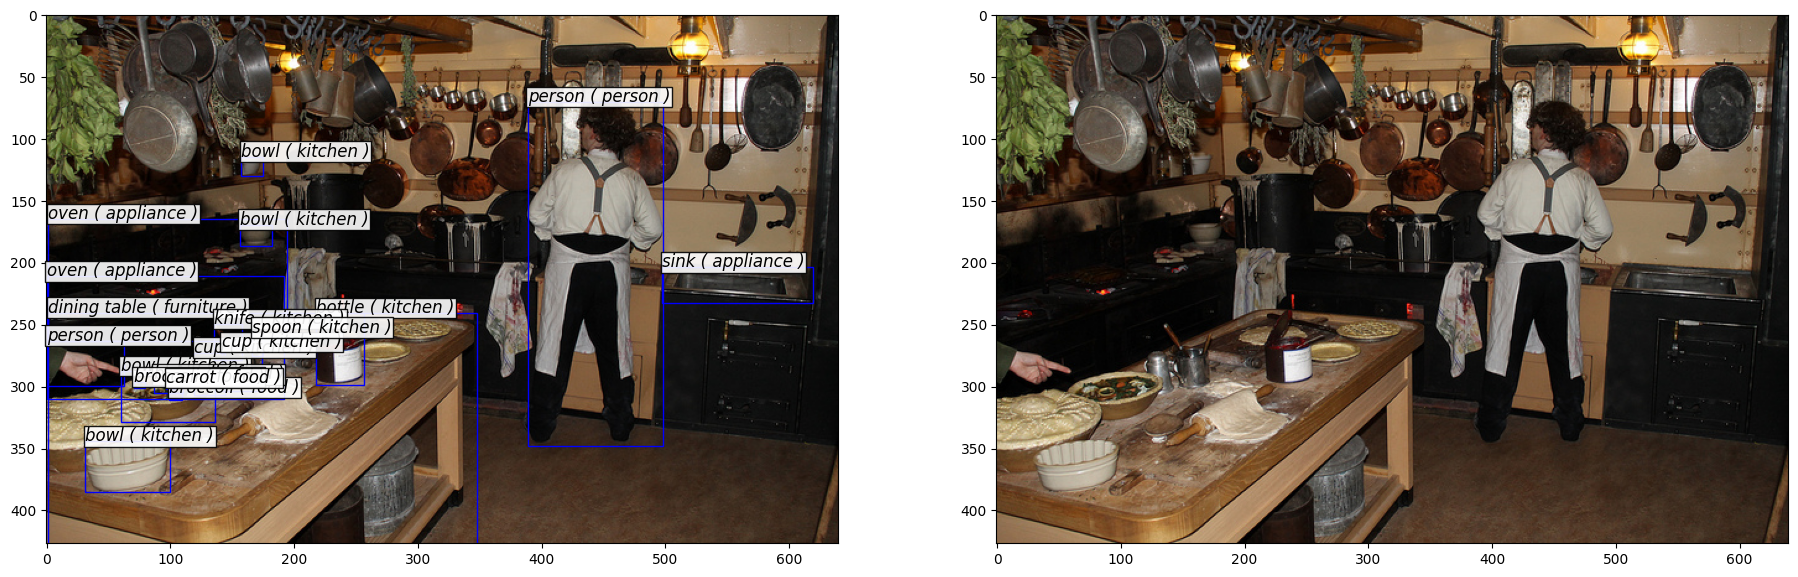

In [30]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import Markdown,display,HTML
#import cv2
import numpy as np
import scipy

def show_image_with_objects(selected_df):
    url = selected_df['coco_url'].values[0]
    img_width = int(selected_df['width'].values[0])
    img_height = int(selected_df['height'].values[0])
        
    image = Image.open(requests.get(url, stream=True).raw)
    
    fsize = (15*img_width/img_height, 15) if img_width > img_height else (15, 15*img_height/img_width)
    fig,axes = plt.subplots(1,2,figsize=(fsize))
    
    ax = axes[0]
    ax1 = axes[1]

    ax.imshow(image)
    ax1.imshow(image)

    
    for index, row in selected_df.iterrows():
        obj = " ".join([row['name'],"(",row['supercategory'],")"])
        x, y, w, h = row['bbox']
        rect = Rectangle((x,y),w,h,linewidth=1,edgecolor='b',facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)
        ax.text(x, y, obj, style='italic',fontsize=12, bbox={'facecolor':'white', 'alpha':0.9, 'pad':1})
        
    plt.show()    

show_image_with_objects(selected_df)


### Inspecting COCO using pycocotools

In [31]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [32]:
dataDir='MSCOCO'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

### initialize **COCO api** for instance annotations

In [33]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.71s)
creating index...
index created!


### display COCO categories and supercategories

In [34]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format('\n'.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person
bicycle
car
motorcycle
airplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
couch
potted plant
bed
dining table
toilet
tv
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush

COCO supercategories: 
vehicle furniture person outdoor appliance food indoor sports electronic kitchen animal accessory


### All images containing given categories, (one is randomly selected)

In [35]:

catIds = coco.getCatIds(catNms=['person','bicycle','car']);
imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

### load and display image

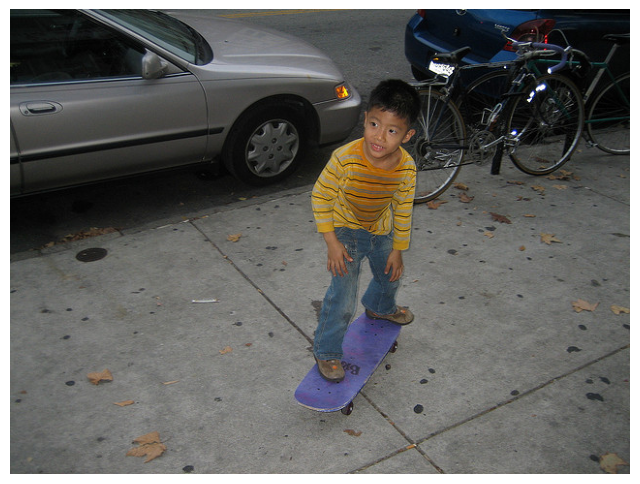

In [36]:

# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

### load and display instance annotations (segmentation)

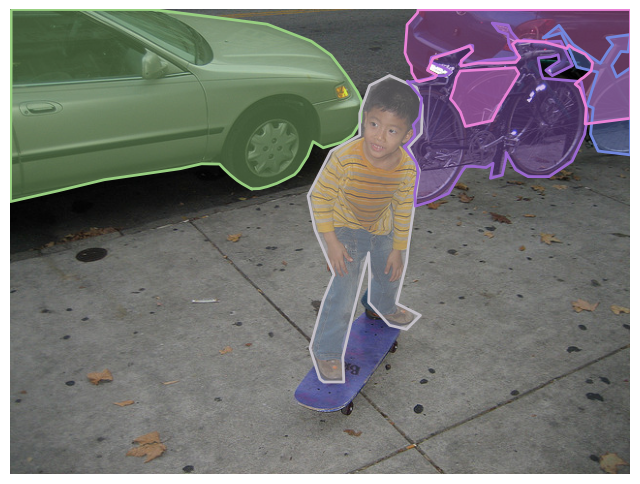

In [37]:

plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

### Show keypoints annotations (only available for **Person**)

In [38]:
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.30s)
creating index...
index created!


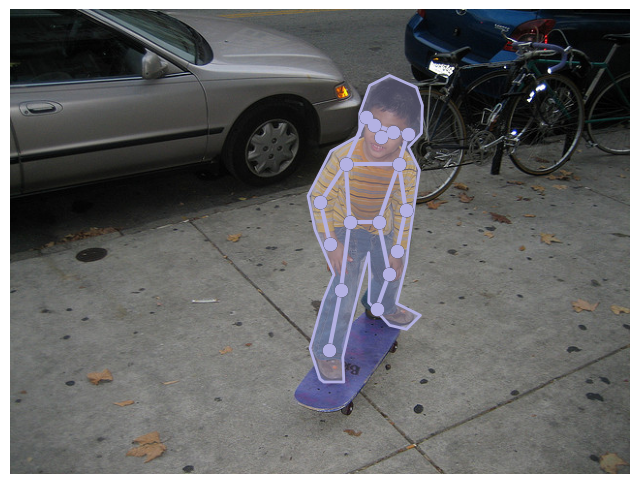

In [39]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)